In [2]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2,5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [4]:
x.view(-1,10)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
x = torch.rand([2,5])
print(x)

tensor([[0.1035, 0.6175, 0.2753, 0.4464, 0.5045],
        [0.3618, 0.1066, 0.2985, 0.8155, 0.2369]])


In [6]:
## .view() is not permanent, use var = var.view() to set it permanently
x.view(1,10)

tensor([[0.1035, 0.6175, 0.2753, 0.4464, 0.5045, 0.3618, 0.1066, 0.2985, 0.8155,
         0.2369]])

In [7]:
###############################################################################

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets


In [9]:
#x = Train, y = Test
x = datasets.MNIST("", download = True, train = True, transform = transforms.Compose([transforms.ToTensor()]))

y = datasets.MNIST("", download = True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

In [10]:
trainset = torch.utils.data.DataLoader(x, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(y, batch_size = 10, shuffle = True)

In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
x, y = data[0][0], data[1][0] #x is the '255' pixels feature, y = label.

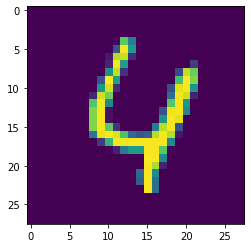

torch.Size([1, 28, 28])


In [13]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()
print(data[0][1].shape) # shape 1,28,28 not 28,28, need to be changed.


In [14]:
counter = 0 
counter_dict = {0:0, 1:0 ,2:0 ,3:0 ,4:0 ,5:0 ,6:0 ,7:0 ,8:0, 9:0}

In [15]:
#x = trainset, y = testset
for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        counter += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
#checking if the data is balanced. Crucial point.
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/counter*100}")


0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [47]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #fc = fully connected layer 'n.1', 28,28 is the rows and columns of the pic in pixels, 64 is         
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64) # 64 is the number passed from the first layer as output, that serves as a input to the next layer
        self.fc4 = nn.Linear(64, 10) # 10 classes range(0,10)
        
    def forward(self, x): # F.relu is the activation function to "fire" the neuron if applicable.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1)
        
    net = Net()
    print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [49]:
X = torch.rand((28,28))
X = X.view(-1,28*28)
net = Net()

In [50]:
output = net(X)


In [51]:
output

tensor([[-2.4105, -2.3239, -2.3763, -2.3268, -2.2201, -2.2039, -2.4050, -2.3016,
         -2.3011, -2.1861]], grad_fn=<LogSoftmaxBackward>)

In [56]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data i s a batch of featursets and labels
        X,y = data
        net.zero_grad() #gadiens that hold the loss, that the optimizers will use.
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y) #2 major ways to calcualte loss: 1) hot vector fx.[0,1,0] - meansquared error, in this case nll.loss
        loss.backward() # magic, 
        optimizer.step()
    print(loss)

tensor(0.0372, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.0099, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print('Accuracy is :',(correct/total))

tensor(6)


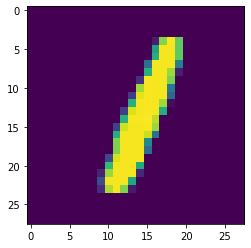

In [73]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [74]:
print(torch.argmax(net(X[1].view(-1,784))))

tensor(1)
